# Introdução ao Machine Learning

## Importação e Visualização do banco de dados

### 1. Importar as bibliotecas necessárias

In [ ]:
import os, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import kagglehub
%matplotlib inline 
np.random.seed(0)
#Importar os dados e realizar uma an ́alise inicial:


/home/usuario/NIAS/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Carrega as variáveis do .env
load_dotenv()  

# Acessa as credenciais
KAGGLE_USERNAME = os.getenv("KAGGLE_USERNAME")
KAGGLE_KEY = os.getenv("KAGGLE_KEY")

print(f"Usuário Kaggle: {KAGGLE_USERNAME}") 

Usuário Kaggle: None


In [5]:
zip_path = "/home/usuario/NIAS/data/external/titanic.zip"
dest_path = "/home/usuario/NIAS/data/processed/titanic.zip"

# Extrair arquivos
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extrair apenas CSV files
    for file in zip_ref.namelist():
        if file.endswith('.csv'):
            zip_ref.extract(file, dest_path)
            print(f"Extraído: {file}")

print("Extração concluída! Verifique a pasta home/usuario/NIAS/data/")

Extraído: gender_submission.csv
Extraído: test.csv
Extraído: train.csv
Extração concluída! Verifique a pasta home/usuario/NIAS/data/


### Importar os dados e realizar uma análise inicial

In [ ]:
# Carregar os arquivos
df_train = pd.read_csv("/home/usuario/NIAS/data/processed/titanic.zip/train.csv")
df_test  = pd.read_csv("/home/usuario/NIAS/data/processed/titanic.zip/test.csv") 

In [131]:
# Gerar estatísticas com describe
display("Dados de treino", df_train.describe(), "Dados de testes",df_test.describe())


'Dados de treino'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'Dados de testes'

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Análise exploratória preliminar

(a) Identificar quais colunas são categóricas e quais são numéricas (diferenciando entre contínuas e discretas). Use o metodo .info();<br>
(b) Verificar a presenca de valores ausentes (NaN) com DataFrame.isnull().sum();<br>
(c) Criar novos dataframes contendo apenas as features numéricas (para treino e teste);<br>
(d) Remover linhas com valores faltantes no conjunto de treino usando DataFrame.dropna();<br>
(e) Substituir os NaN por 0 no conjunto de teste, utilizando DataFrame.fillna(0)

In [132]:
# (a) Identificar quais colunas são categóricas e quais são numéricas (diferenciando entre contínuas e discretas). Use o metodo .info();<br>
display(df_train.info(), df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

None

None

In [133]:
#(b) Verificar a presenca de valores ausentes (NaN) com DataFrame.isnull().sum();<br>
display("Dados de treino", df_train.isnull().sum(), "Dados de testes",df_test.isnull().sum
())

'Dados de treino'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Dados de testes'

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [134]:
# (c) Criar novos dataframes contendo apenas as features numéricas (para treino e teste);
df_train =  df_train.select_dtypes("number")
df_test  =  df_test.select_dtypes("number")

In [135]:
#(d) Remover linhas com valores faltantes no conjunto de treino usando DataFrame.dropna();
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [136]:
#(e) Substituir os NaN por 0 no conjunto de teste, utilizando DataFrame.fillna(0)
df_train.fillna(0)
df_test.fillna(0)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,1301,3,3.0,1,1,13.7750
411,1303,1,37.0,1,0,90.0000
412,1304,3,28.0,0,0,7.7750
414,1306,1,39.0,0,0,108.9000


## 2. Exploraçao do banco de dados
Objetivo: Visualizar a influência das features nas taxas de sobrevivênncia. Para isso, serão
criados gráficos com `sns.barplot`, que comparam médias de sobrevivência para diferentes faixas ou categorias.
1. Análise da feature `“Age”`: <br>
(a) Criar uma lista com rótulos (ex.: “(0–10)”, “(10–20)”, etc.); <br>
(b) Agrupar a coluna “Age” em 8 faixas utilizando `pandas.cut()`, com rótulos apropriados; <br>
(c) Criar uma nova coluna com os grupos de idade; <br>
(d) Utilizar `sns.barplot()` para visualizar a taxa de sobrevivência por faixa etária; <br>
(e) Interpretar os resultados obtidos no gráfico. <br>


In [137]:
df_train["Age_label"] = pd.cut(df_train["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
        labels = ["(0-10)", "(10-20)", "(20-30)", "(30-40)", "(40-50)", 
        "(50-60)", "(60-70)", "(70-80)"])

In [138]:
df_train["Age_Group"] = pd.cut(df_train["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
        labels = ["Bebê (0-10)", "Criança (10-20)", "Adolescente (20-30)", 
        "Jovem (30-40)", "Adulto (40-50)","Meia-idade (50-60)", "Senior (60-70)", "Idoso (70-80)"])

In [139]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_label,Age_Group
0,1,0,3,22.0,1,0,7.2500,(20-30),Adolescente (20-30)
1,2,1,1,38.0,1,0,71.2833,(30-40),Jovem (30-40)
2,3,1,3,26.0,0,0,7.9250,(20-30),Adolescente (20-30)
3,4,1,1,35.0,1,0,53.1000,(30-40),Jovem (30-40)
4,5,0,3,35.0,0,0,8.0500,(30-40),Jovem (30-40)


<Axes: xlabel='Age_Group', ylabel='count'>

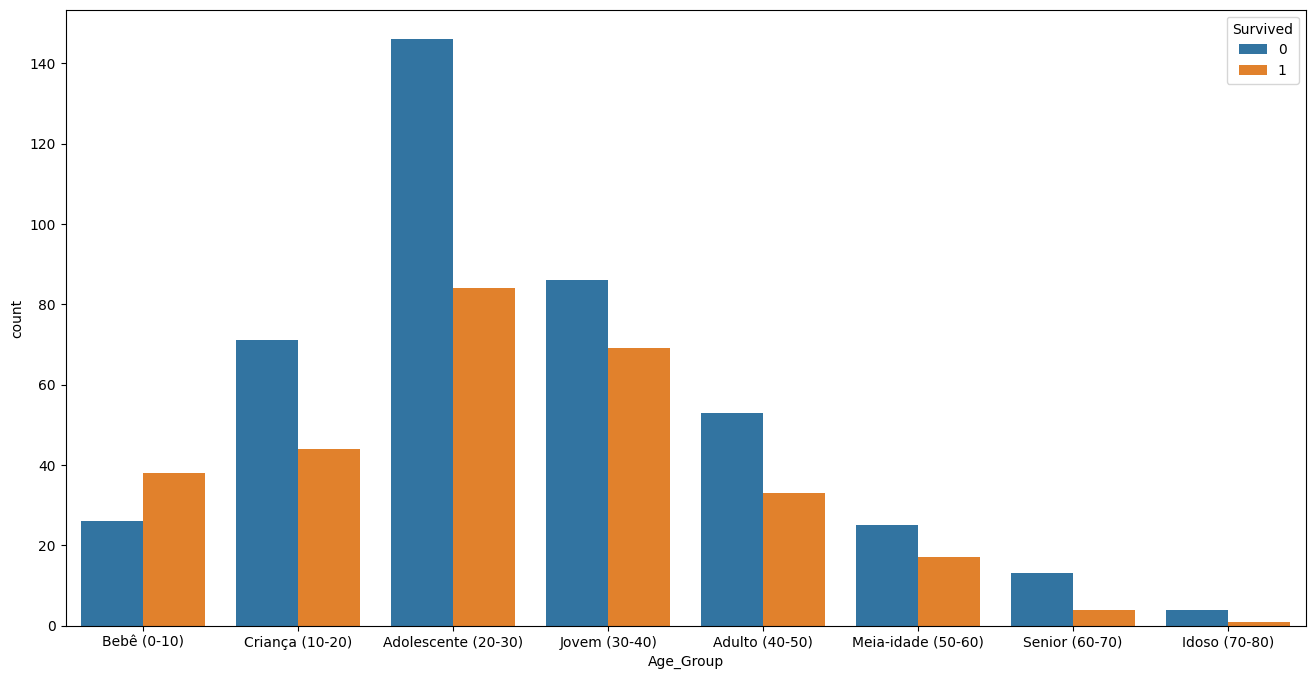

In [140]:
plt.figure(figsize=(16, 8))
sns.countplot(x = df_train.Age_Group, hue=df_train.Survived)

/tmp/ipykernel_26545/1569193574.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivencia_por_grupo = df_train.groupby(['Age_Group', 'Survived']).size().unstack()


<Axes: xlabel='Age_Group'>

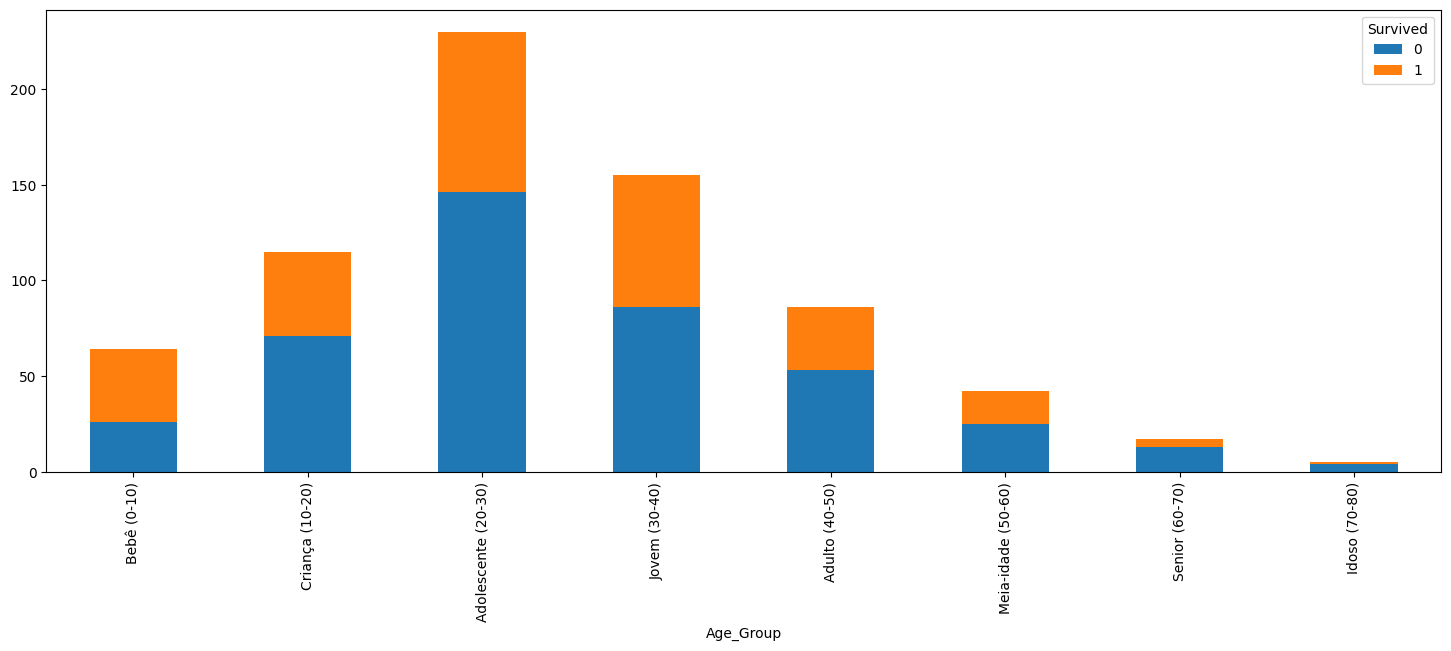

In [141]:
sobrevivencia_por_grupo = df_train.groupby(['Age_Group', 'Survived']).size().unstack()
sobrevivencia_por_grupo.plot(kind="bar", stacked=True, figsize=(18,6))

## Analisar graficamente as demais features numéricas discretas:
(a) Criar gráficos individuais para cada feature; <br>
(b) Produzir interpretaçoes sobre como cada variável pode impactar a previsão de sobrevivência; <br>
(c) A feature `“Fare”` pode ser omitida nesta etapa

In [142]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_label,Age_Group
0,1,0,3,22.0,1,0,7.2500,(20-30),Adolescente (20-30)
1,2,1,1,38.0,1,0,71.2833,(30-40),Jovem (30-40)
2,3,1,3,26.0,0,0,7.9250,(20-30),Adolescente (20-30)
3,4,1,1,35.0,1,0,53.1000,(30-40),Jovem (30-40)
4,5,0,3,35.0,0,0,8.0500,(30-40),Jovem (30-40)


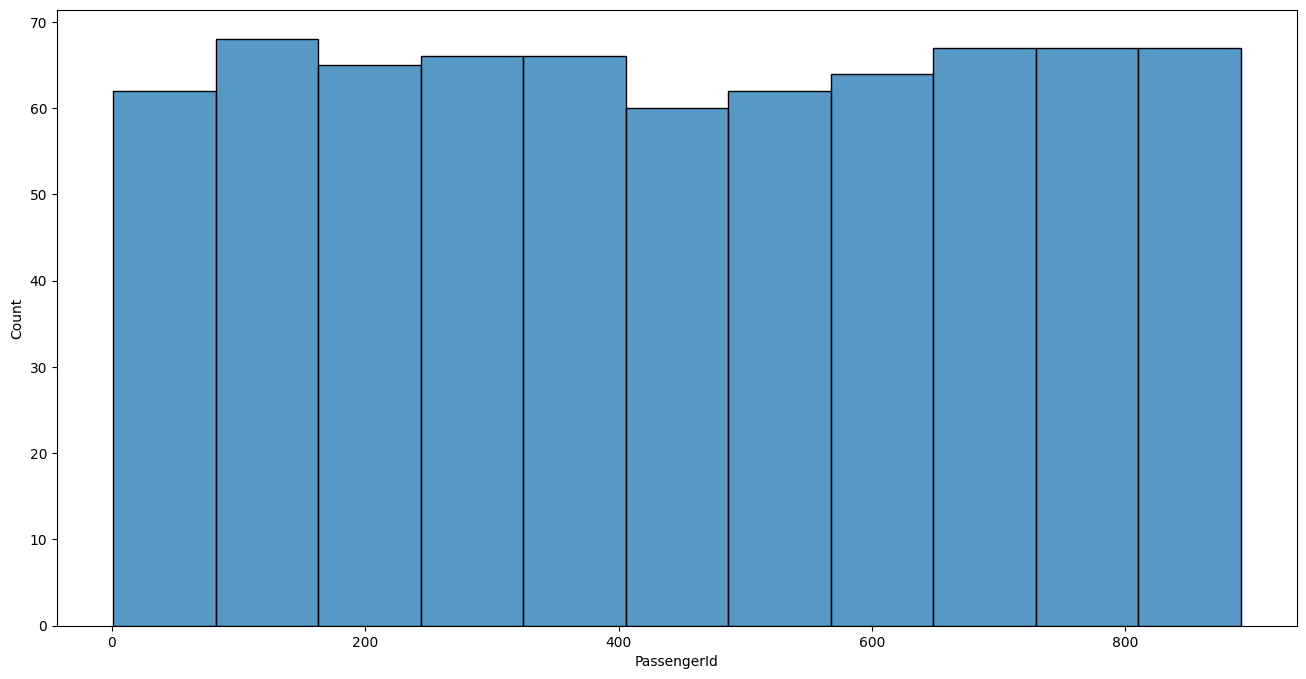

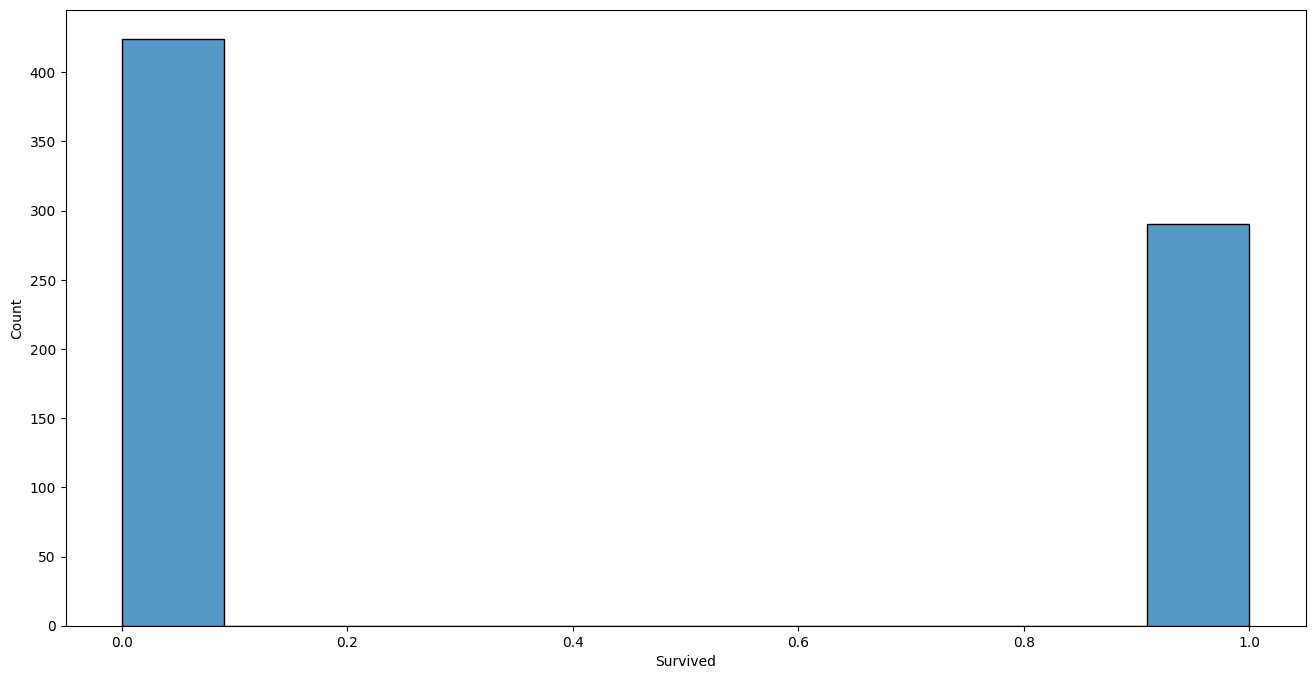

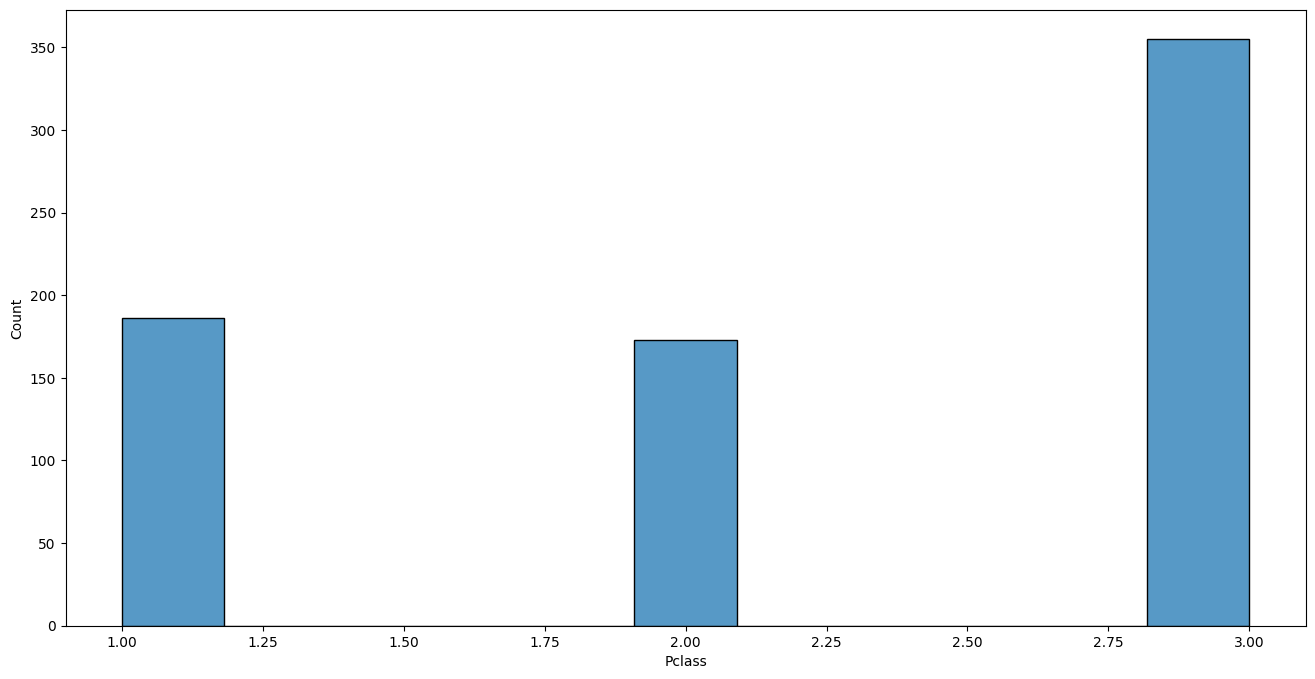

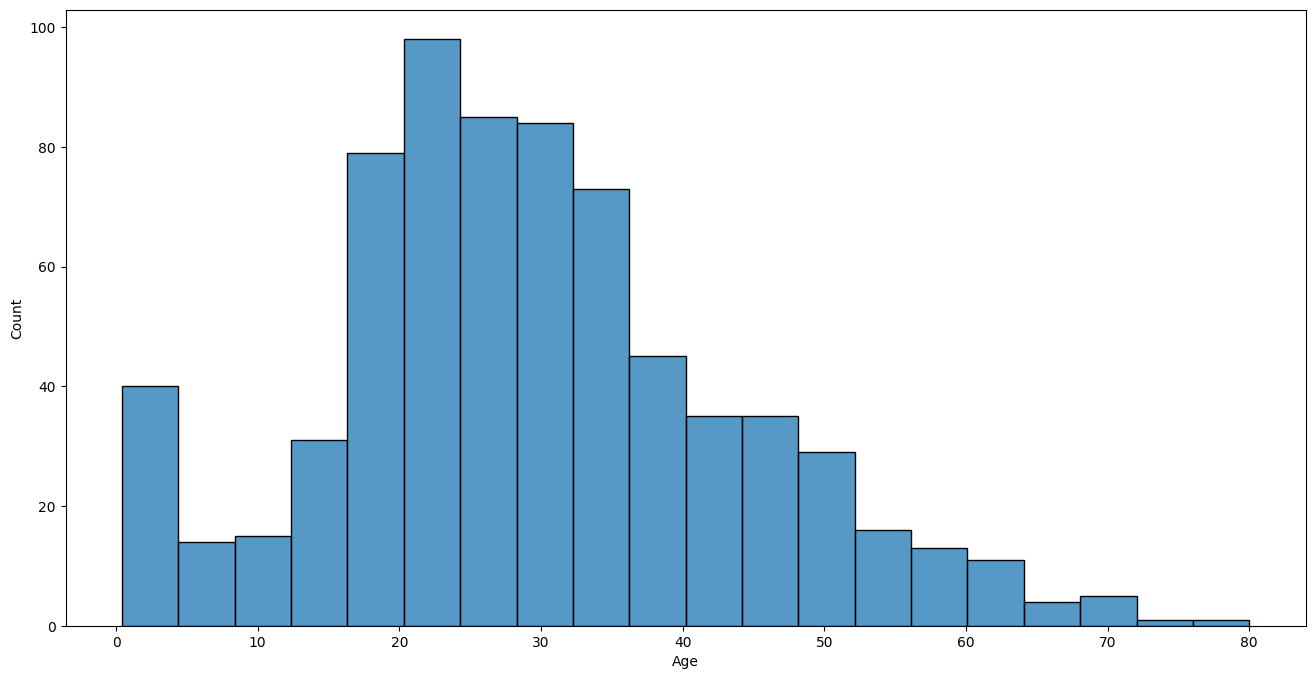

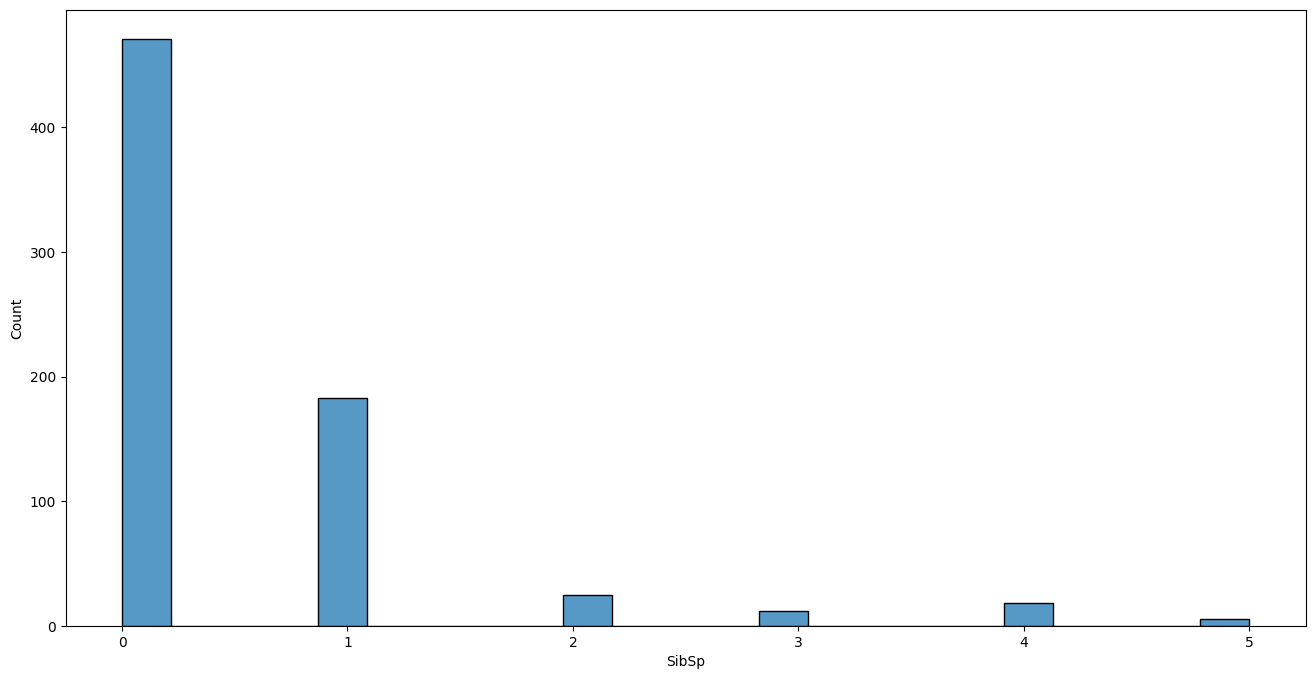

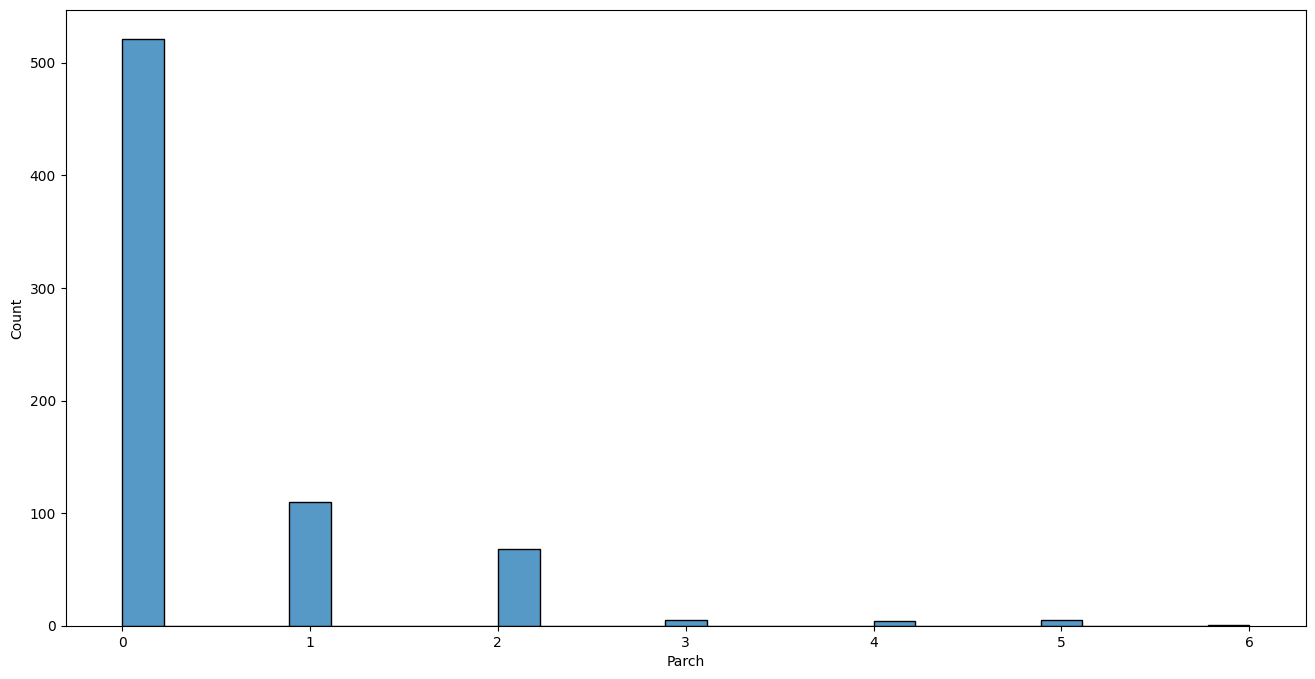

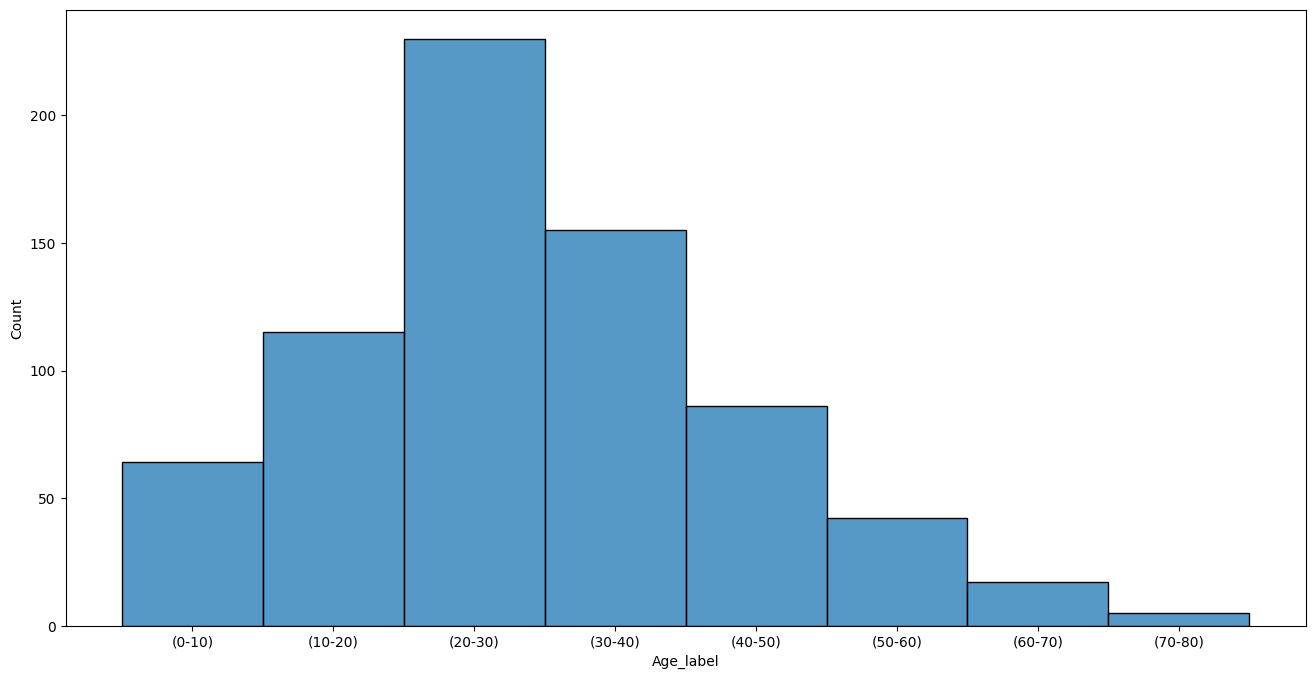

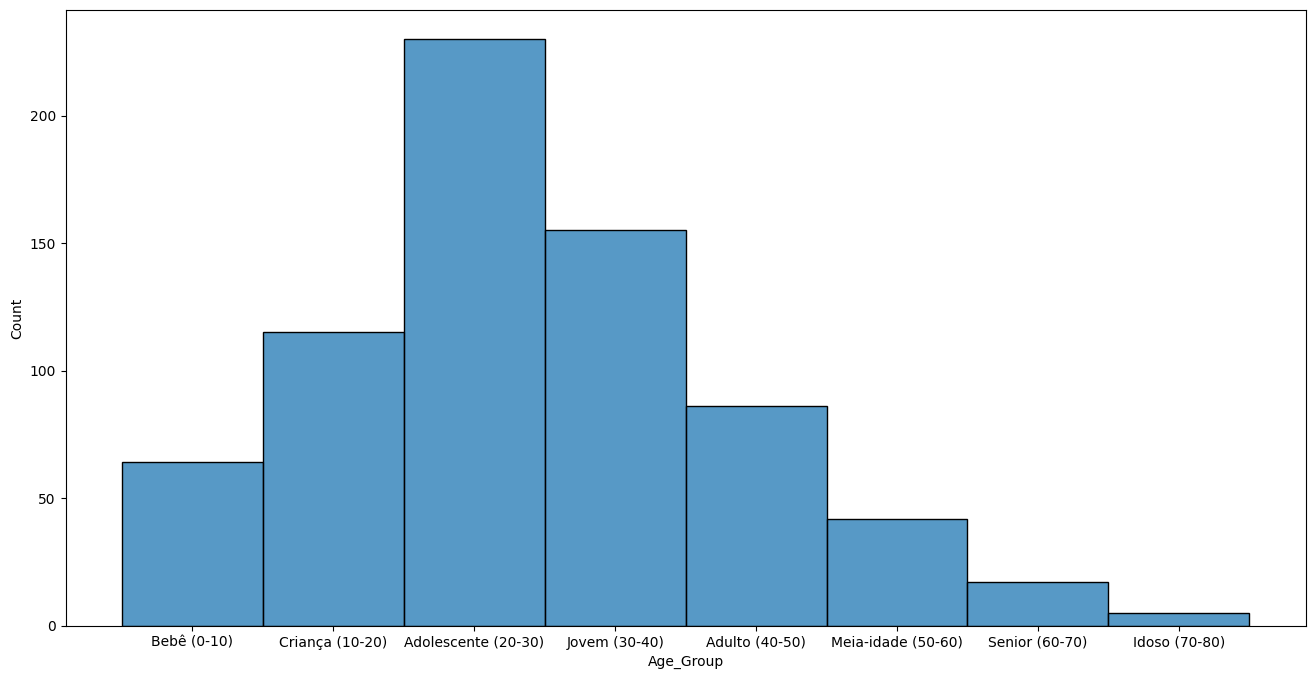

In [143]:
for i in df_train.columns:
    if i != "Fare":
        plt.figure(figsize=(16, 8))
        sns.histplot(x=i, data=df_train)
        plt.show()


## 3.Treinamento do modelo e submissão das prediçoes
Agora, será construído o primeiro modelo preditivo. A etapa inclui a separaçao entre treino e
validaçao, treinamento com `Random Forest Classifier` e geraçao de um arquivo para submiss ̃ao na
competiçao.

1. Separaçao entre treino e validaçao:<br>
(a) Criar a variável X com apenas as features numéricas (remover a coluna `“PassengerId”`); <br>
(b) Criar a variável y contendo os valores da coluna `Survived`;<br>
(c) Utilizar `train test split` com validaçao de **20%**; <br>

In [144]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_label,Age_Group
0,1,0,3,22.0,1,0,7.2500,(20-30),Adolescente (20-30)
1,2,1,1,38.0,1,0,71.2833,(30-40),Jovem (30-40)
2,3,1,3,26.0,0,0,7.9250,(20-30),Adolescente (20-30)
3,4,1,1,35.0,1,0,53.1000,(30-40),Jovem (30-40)
4,5,0,3,35.0,0,0,8.0500,(30-40),Jovem (30-40)
...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,(30-40),Jovem (30-40)
886,887,0,2,27.0,0,0,13.0000,(20-30),Adolescente (20-30)
887,888,1,1,19.0,0,0,30.0000,(10-20),Criança (10-20)
889,890,1,1,26.0,0,0,30.0000,(20-30),Adolescente (20-30)


In [145]:
X ,y =  df_train.drop(columns= ["PassengerId", "Age_label", "Age_Group"]), df_train["Survived"]

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

2. Treinamento e validaçao do modelo: <br>
(a) Importar `RandomForestClassifier` da biblioteca **`sklearn.ensemble`**; <br>
(b) Importar `accuracy score` de `sklearn.metrics`;<br>
(c) Treinar o classificador com os dados de treino; <br>
(d) Realizar prediçoes com os dados de validação; <br>
(e) Avaliar a acurácia do modelo utilizando `accuracy score`; <br>
(f) Discutir a qualidade da prediçao obtida. <br>

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [148]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [149]:
y_pred = clf.predict(X_test)

In [150]:
accuracy_score(y_test, y_pred)

1.0

3. Geracao e submissao da predição: <br>
(a) Treinar o modelo novamente, agora com todos os dados de treino disponíveis; <br>
(b) Armazer os valores da coluna `“PassengerId”` do conjunto de teste; <br>
(c) Realizar as predições com os dados de teste; <br>
(d) Criar um DataFrame com os campos PassengerId e Survived; <br>
(e) Exportar o dataframe para CSV com `DataFrame.to_csv()`;<br>
(f) Salvar a vers ̃ao no Kaggle `(“Save Version”)` e submetê-la à competição.

In [152]:
# Preparar dados completos de treino
X_train = df_train.drop(['Survived', 'PassengerId', "Age_label", "Age_Group"], axis=1)
y_train = df_train['Survived']

# Treinar modelo final com todos os dados
modelo_final = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_final.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [153]:
# Armazenar IDs dos passageiros de teste
passenger_ids = df_test['PassengerId'].values
print(f"Número de passageiros para predição: {len(passenger_ids)}")

Número de passageiros para predição: 331


In [159]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,1301,3,3.0,1,1,13.7750
411,1303,1,37.0,1,0,90.0000
412,1304,3,28.0,0,0,7.7750
414,1306,1,39.0,0,0,108.9000


In [161]:
# Preparar dados de teste (mesmo pré-processamento que os de treino)
X_test = df_test.drop(['PassengerId'], axis=1)

# Fazer predições
predicoes = modelo_final.predict(X_test)
print(f"Predições realizadas: {len(predicoes)}")
print(f"Sobreviventes previstos: {sum(predicoes)}")

Predições realizadas: 331
Sobreviventes previstos: 153


In [162]:
# Criar DataFrame de submissão
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predicoes
})

print("DataFrame de submissão:")
print(submission_df.head())
print(f"\nShape do DataFrame: {submission_df.shape}")

DataFrame de submissão:
   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         0

Shape do DataFrame: (331, 2)


In [167]:
# Exportar para CSV
submission_df.to_csv("/home/usuario/NIAS/models/predictions/titanic_submission.csv", index=False)

print("Arquivo salvo como: titanic_submission.csv")
print("Primeiras linhas do arquivo:")
print(submission_df.head())

Arquivo salvo como: titanic_submission.csv
Primeiras linhas do arquivo:
   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         0
